# Trie


In [2]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.end_of_word = False


class Trie:

    def __init__(self):
        self.root = TrieNode()
        self.result = []

    def insert(self, word: str) -> None:
        '''
        Inserts a word into the trie.
        '''
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.end_of_word = True

    def search(self, word: str) -> bool:
        '''
        Returns if the word is in the trie.
        '''
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.end_of_word

    def startsWith(self, prefix: str) -> bool:
        '''
        Returns if there is any word in the trie that starts with the given prefix.
        '''
        node = self.root
        for char in prefix:
            if char not in node.children:
                return False
            node = node.children[char]
        return True

    def delete(self, word: str) -> None:
        '''
        Deletes a word from the trie.
        '''
        def delete_helper(node, word, index):
            if index == len(word):
                node.end_of_word = False
                return len(node.children) == 0
            char = word[index]
            if char not in node.children:
                return False
            should_delete = delete_helper(node.children[char], word, index + 1)
            if should_delete:
                del node.children[char]
                return len(node.children) == 0
            return False

        delete_helper(self.root, word, 0)

    def dfs(self, node: TrieNode, word: str):
        '''
        Depth-first search
        '''
        if node.end_of_word:
            self.result.append(word)
        for i in range(26):
            char = chr(ord('a') + i)
            if char in node.children:
                self.dfs(node.children[char], word := word + char)
                word = word[:-1]


In [3]:
from time import time
from random import randint

trie = Trie()
list_of_words = []
for _ in range(100):
    word = ''.join([chr(randint(ord('a'), ord('z'))) for _ in range(100)])
    list_of_words.append(word)
    trie.insert(word)

# Calculate the time dfs in Trie
start = time()
trie.dfs(trie.root, '')
print(time() - start)

# Caculate the time sort  in list of words
start = time()
list_of_words.sort()
print(time() - start)
print(list_of_words == trie.result)


0.0797891616821289
0.0
True


In [4]:
new_trie = Trie()
new_trie.insert('apple')
new_trie.insert('app')
new_trie.insert('append')
new_trie.insert('blink')
new_trie.insert('blumber')
new_trie.insert('blumberg')
new_trie.insert('university')
new_trie.insert('universe')
new_trie.insert('united')


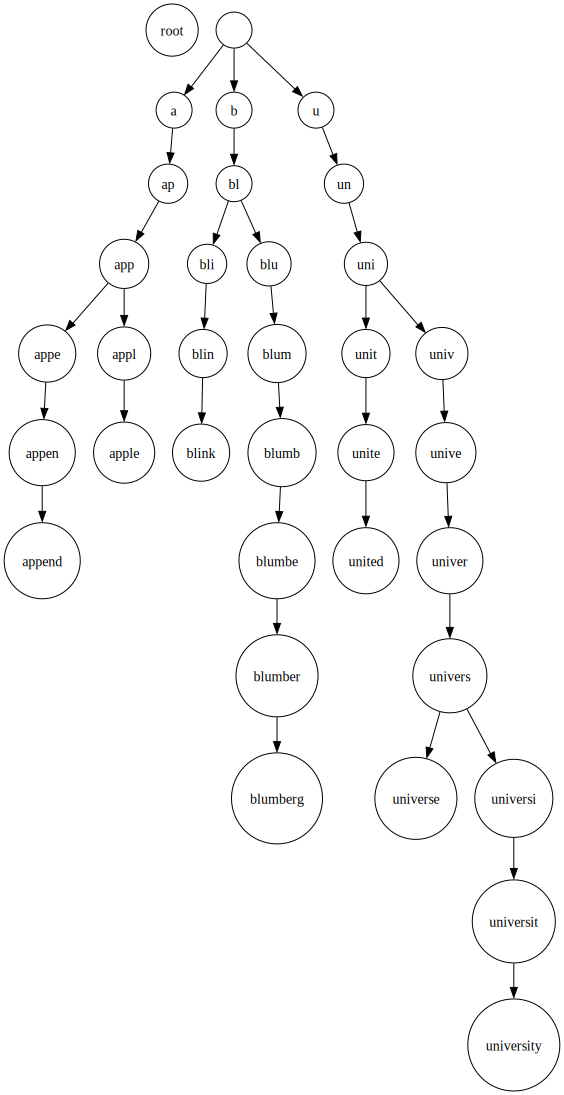

In [9]:
from graphviz import Digraph
dot = Digraph()
dot.attr('node', shape='circle')
dot.node('root')


def visualize(node: TrieNode, word: str):
    for i in range(26):
        char = chr(ord('a') + i)
        if char in node.children:
            dot.node(word + char)
            dot.edge(word, word + char)
            visualize(node.children[char], word + char)

# visualize(new_trie.root, '')
# dot.render('trie.gv', view=True)
# print(dot)
# dot


# new_trie.delete('united')
visualize(new_trie.root, '')
dot
